In [1]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


from itertools import combinations


Nota: Trabajo con una muestra del 10% de los datos, por lo que habrá discrepancias con el dato original (conteos, etc)

In [2]:
df_muestra = pd.read_csv("datos_muestra.cvs")
df_muestra

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,975944,Canada,British Columbia,Vancouver,V6E 3Z3,Male,Bachelor,47884.0,Married,Nova,7123.08,Standard,2013,4,2017,5,0,0,0,0,0.0,0,0
1,444154,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,63076.0,Single,Aurora,11124.21,Standard,2012,10,2017,9,2,2,4,1920,192.0,0,0
2,293266,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,53061.0,Married,Aurora,5246.28,Standard,2014,10,2017,10,13,7,20,2540,254.0,0,0
3,587619,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,81959.0,Divorced,Star,3455.23,Standard,2012,4,2017,4,8,5,13,3029,302.0,0,0
4,150291,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,Bachelor,70384.0,Single,Nova,8879.79,Standard,2013,11,2017,12,5,0,5,2240,224.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40557,949134,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,100256.0,Married,Nova,3193.82,Standard,2013,6,2018,9,5,0,5,2675,267.0,0,0
40558,414727,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,102379.0,Divorced,Nova,7519.13,Standard,2014,2,2017,3,0,0,0,0,0.0,0,0
40559,590025,Canada,Ontario,Trenton,K8V 4B2,Female,College,73455.0,Married,Nova,6331.34,Standard,2017,12,2017,10,0,0,0,0,0.0,0,0
40560,323821,Canada,British Columbia,Vancouver,V5R 1W3,Female,High School or Below,49083.0,Married,Aurora,5297.63,Standard,2016,12,2017,11,5,5,10,3420,342.0,0,0


# Visualizaciones

1- ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [3]:
#Agrupo por mes y año para contar el número de vuelos 
resumen_por_mes = df_muestra.groupby(['year', 'month'])['total_flights'].sum().reset_index()

In [4]:
resumen_por_mes

,year,month,total_flights
0,2017,1,5496
1,2017,2,6207
2,2017,3,8007
3,2017,4,6709
4,2017,5,7257
5,2017,6,10364
6,2017,7,11489
7,2017,8,10519
8,2017,9,7850
9,2017,10,7638


In [5]:

resumen_por_mes['month'] = resumen_por_mes['month'].astype(str)
resumen_por_mes

,year,month,total_flights
0,2017,1,5496
1,2017,2,6207
2,2017,3,8007
3,2017,4,6709
4,2017,5,7257
5,2017,6,10364
6,2017,7,11489
7,2017,8,10519
8,2017,9,7850
9,2017,10,7638


In [6]:
dicc_meses= {"1": "enero", "2": "febrero", "3": "marzo", "4": "abril", "5": "mayo", "6": "junio", "7": "julio", "8": "agosto", "9": "septiempre", "10": "octubre", "11": "noviembre", "12": "diciembre"}
resumen_por_mes['month'] = resumen_por_mes['month'].map(dicc_meses)

In [7]:
resumen_por_mes

,year,month,total_flights
0,2017,enero,5496
1,2017,febrero,6207
2,2017,marzo,8007
3,2017,abril,6709
4,2017,mayo,7257
5,2017,junio,10364
6,2017,julio,11489
7,2017,agosto,10519
8,2017,septiempre,7850
9,2017,octubre,7638


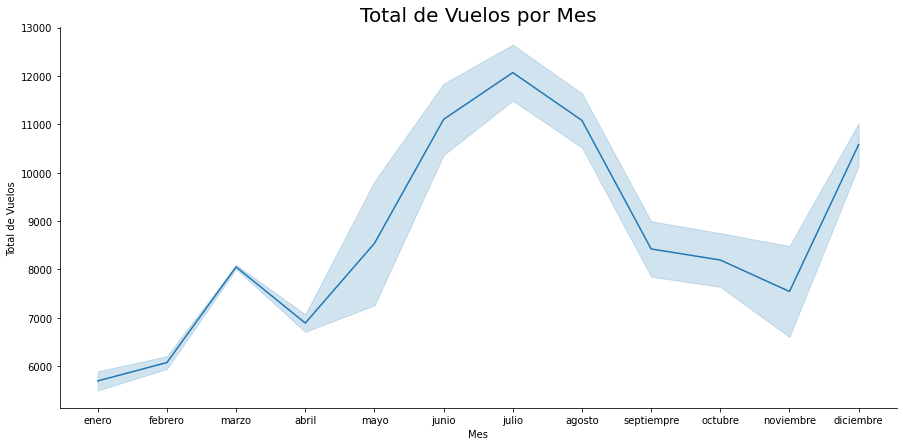

In [8]:
#Lineplot - gráfico lineal

plt.figure(figsize=(15,7))
sns.lineplot(resumen_por_mes, x="month", y="total_flights")
sns.set_palette("mako")

plt.xlabel('Mes')
plt.ylabel('Total de Vuelos')
plt.title('Total de Vuelos por Mes', fontsize = 20)
sns.despine();

Como se puede apreciar en este gráfico de línia el mes donde hay el pico de número de vuelos máximo es juliol, coincidiendo con las vacaciones de verano. Los meses en los que se detecta menos movimiento son enero y febrero.

___
2- ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [9]:
df_muestra.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,975944,Canada,British Columbia,Vancouver,V6E 3Z3,Male,Bachelor,47884.0,Married,Nova,7123.08,Standard,2013,4,2017,5,0,0,0,0,0.0,0,0
1,444154,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,63076.0,Single,Aurora,11124.21,Standard,2012,10,2017,9,2,2,4,1920,192.0,0,0
2,293266,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,53061.0,Married,Aurora,5246.28,Standard,2014,10,2017,10,13,7,20,2540,254.0,0,0
3,587619,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,81959.0,Divorced,Star,3455.23,Standard,2012,4,2017,4,8,5,13,3029,302.0,0,0
4,150291,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,Bachelor,70384.0,Single,Nova,8879.79,Standard,2013,11,2017,12,5,0,5,2240,224.0,0,0


In [10]:
df_muestra['distance']

0           0
1        1920
2        2540
3        3029
4        2240
         ... 
40557    2675
40558       0
40559       0
40560    3420
40561     408
Name: distance, Length: 40562, dtype: int64

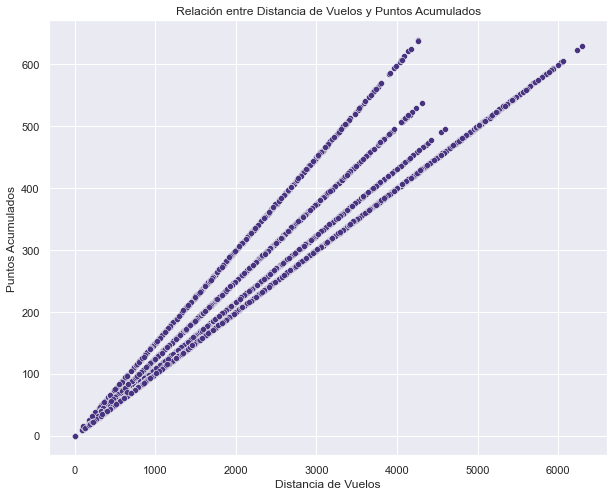

In [11]:
#scatterplot:

sns.set(rc={'figure.figsize': (10, 8)})
sns.set_palette("viridis")

# Graficar scatter plot
sns.scatterplot(data=df_muestra, x="distance", y="points_accumulated")
plt.title('Relación entre Distancia de Vuelos y Puntos Acumulados')
plt.xlabel('Distancia de Vuelos')
plt.ylabel('Puntos Acumulados')
plt.show()

Este scatterplot muestra una evidente tendencia en la cual cuanto más larga es la distancia del vuelo, más puntos acomula el cliente

_____
3- ¿Cuál es la distribución de los clientes por provincia o estado?

In [12]:
print(df_muestra["loyalty_number"].describe())

count     40562.000000
mean     549674.129653
std      258753.014203
min      100018.000000
25%      327470.000000
50%      550896.000000
75%      771701.500000
max      999986.000000
Name: loyalty_number, dtype: float64


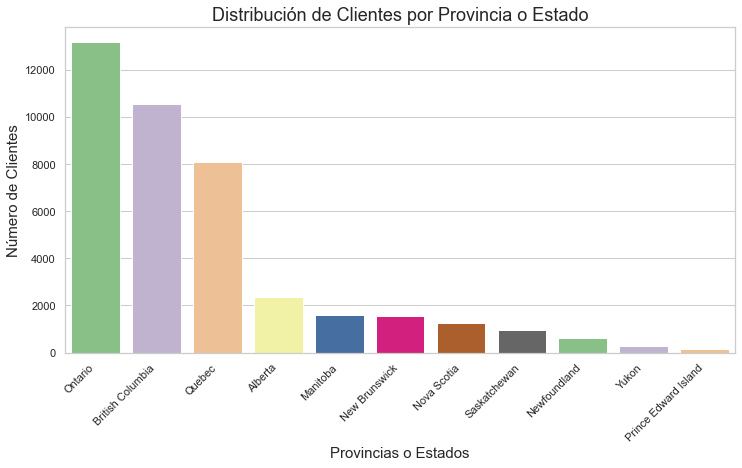

In [13]:
# Cuento el número de clientes por provincia
counts = df_muestra["province"].value_counts()
sns.set(style="whitegrid")
palette = "Accent"

# Creao un gráfico de barras:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=counts.index, y=counts, palette=palette)

plt.xlabel('Provincias o Estados', fontsize = 15)
plt.ylabel('Número de Clientes', fontsize = 15)
plt.title('Distribución de Clientes por Provincia o Estado', fontsize = 18)

# Roto las etiquetas del eje x para que sea más visible
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right')

plt.show()


El gráfico de barras muestra un conteo del númeto de clientes por província o estado, donde podemos observar que Ontario es la región con mayor número de clientes, mientras que Prince Edward Island la región que tiene menos.

___
4- ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [14]:
#Calculo el promedio de salario por nivel educativo:

salarios_educativos = df_muestra.groupby('education')['salary'].mean().reset_index()

In [15]:
salarios_educativos

,education,salary
0,Bachelor,72660.031549
1,College,73455.000000
2,Doctor,175768.256561
3,High School or Below,60981.763475
4,Master,104006.896114


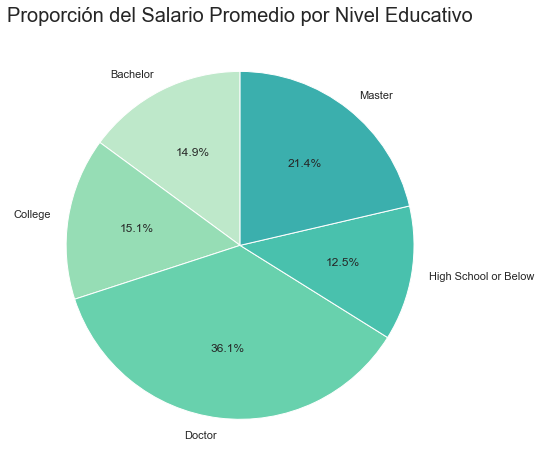

In [16]:
#Pie plot: 

colores = sns.color_palette('mako_r', n_colors=15) 

plt.figure(figsize=(8, 8))
plt.pie(salarios_educativos['salary'], labels=salarios_educativos['education'], autopct='%1.1f%%', startangle=90, colors=colores)

plt.title('Proporción del Salario Promedio por Nivel Educativo', fontsize = 20)
plt.show()

Como se puede apreciar en la gráfica, los clientes con estudios de cdoctorado son los que tienen un promedio de sueldo más elevado. Miestras que los que tienen estudios básico ("high school") tienen sueldos más bajos.

___
5- ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [17]:
proporcion_tarjetas = df_muestra["loyalty_card"].value_counts(normalize=True)
proporcion_tarjetas

loyalty_card
Star      0.453158
Nova      0.338149
Aurora    0.208693
Name: proportion, dtype: float64

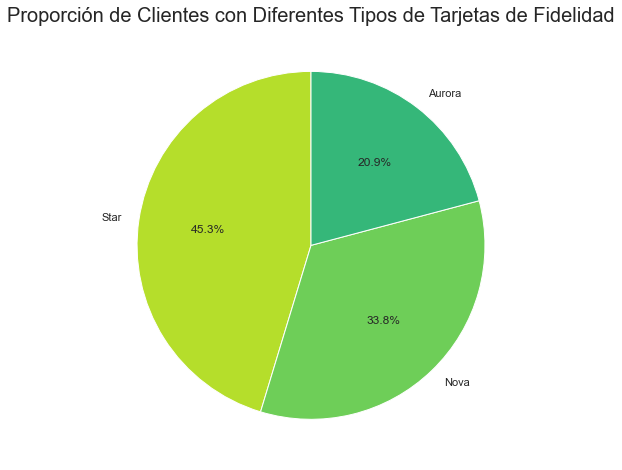

In [18]:
#Pie plot: 

colores = sns.color_palette('viridis_r', n_colors=8) 
# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(proporcion_tarjetas, labels=proporcion_tarjetas.index, autopct='%1.1f%%', startangle=90, colors=colores)

plt.title('Proporción de Clientes con Diferentes Tipos de Tarjetas de Fidelidad', fontsize=20)
plt.show()

Como podemos apreciar en el gráfico, más de un 45% de clientes tiene la tarjeta  de fidelidad Star.

______
6- ¿Cómo se distribuyen los clientes según su estado civil y género?

In [19]:
df_muestra.head()
#gender
# marital_status


,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,975944,Canada,British Columbia,Vancouver,V6E 3Z3,Male,Bachelor,47884.0,Married,Nova,7123.08,Standard,2013,4,2017,5,0,0,0,0,0.0,0,0
1,444154,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,63076.0,Single,Aurora,11124.21,Standard,2012,10,2017,9,2,2,4,1920,192.0,0,0
2,293266,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,53061.0,Married,Aurora,5246.28,Standard,2014,10,2017,10,13,7,20,2540,254.0,0,0
3,587619,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,81959.0,Divorced,Star,3455.23,Standard,2012,4,2017,4,8,5,13,3029,302.0,0,0
4,150291,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,Bachelor,70384.0,Single,Nova,8879.79,Standard,2013,11,2017,12,5,0,5,2240,224.0,0,0


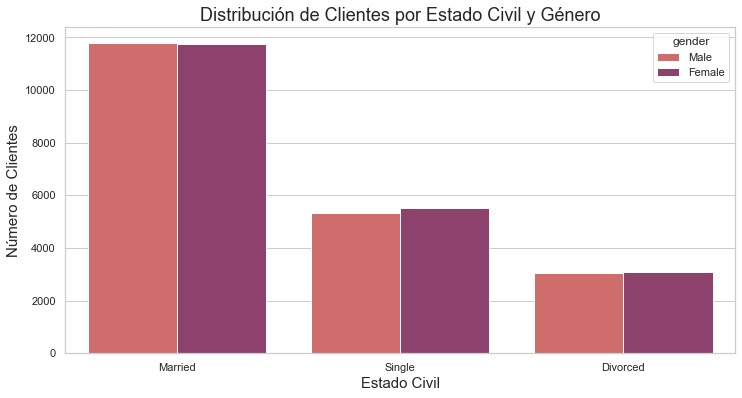

In [20]:
sns.set(style="whitegrid")

# Crear un gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.countplot(x="marital_status", hue="gender", data=df_muestra, palette="flare", dodge=True)

plt.xlabel('Estado Civil', fontsize=15)
plt.ylabel('Número de Clientes', fontsize=15)
plt.title('Distribución de Clientes por Estado Civil y Género', fontsize=18);

Las gráficas nos muestran que predominan los clientes casados, tanto del genero femenino como del masculino.